<a href="https://colab.research.google.com/github/rishik-00/Natural-Language-Processing/blob/master/NLP_on_songs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import  tensorflow as  tf
from tensorflow.keras.preprocessing.text import  Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [0]:
data = open('/songs.txt').read()
data = data.lower().split('\n')

In [0]:
tokenizer = Tokenizer()

In [107]:
tokenizer.fit_on_texts(data)
total_words = len(tokenizer.word_index)+ 1
total_words

283

In [0]:
input_sequences = []
for line in data:
  token_list = tokenizer.texts_to_sequences([line])[0] # this [line] is used to do word by word, and [0] isto get rid of the  nested list
  for i in range(1, len(token_list)):
    sequence = token_list[:i+1]
    input_sequences.append(sequence)

# pad sequences
max_len = max(len(x) for x in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen = max_len, padding = 'pre')

In [109]:
input_sequences


array([[  0,   0,   0, ...,   0,   4,  51],
       [  0,   0,   0, ...,   4,  51,  17],
       [  0,   0,   0, ...,  51,  17,   7],
       ...,
       [  0,   0,   0, ...,  14,  99, 282],
       [  0,   0,   0, ...,  99, 282,  31],
       [  0,   0,   0, ..., 282,  31,   1]], dtype=int32)

In [0]:
xs = input_sequences[:,:-1]
label = input_sequences[:, -1]


In [0]:
y_train = tf.keras.utils.to_categorical(label, num_classes = total_words)

In [112]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(total_words, 64, input_length = max_len-1))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)))
model.add(tf.keras.layers.Dense(total_words, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'] ,optimizer = 'adam')
history = model.fit(xs, y_train, epochs = 200, verbose = 1)

Epoch 1/200
32/32 [==============================] - 0s 10ms/step - loss: 5.6094 - accuracy: 0.0479
Epoch 2/200
32/32 [==============================] - 0s 10ms/step - loss: 5.1738 - accuracy: 0.0429
Epoch 3/200
32/32 [==============================] - 0s 10ms/step - loss: 4.8305 - accuracy: 0.0449
Epoch 4/200
32/32 [==============================] - 0s 10ms/step - loss: 4.7689 - accuracy: 0.0509
Epoch 5/200
32/32 [==============================] - 0s 11ms/step - loss: 4.7198 - accuracy: 0.0689
Epoch 6/200
32/32 [==============================] - 0s 9ms/step - loss: 4.6616 - accuracy: 0.0888
Epoch 7/200
32/32 [==============================] - 0s 10ms/step - loss: 4.5984 - accuracy: 0.0758
Epoch 8/200
32/32 [==============================] - 0s 9ms/step - loss: 4.5190 - accuracy: 0.0938
Epoch 9/200
32/32 [==============================] - 0s 10ms/step - loss: 4.4215 - accuracy: 0.1078
Epoch 10/200
32/32 [==============================] - 0s 9ms/step - loss: 4.3173 - accuracy: 0.1228
Ep

In [0]:
import matplotlib.pyplot as plt
def plot_graph(history, string):
  plt.plot(history.history[string])
  plt.xlabel('epochs')
  plt.ylabel(string)

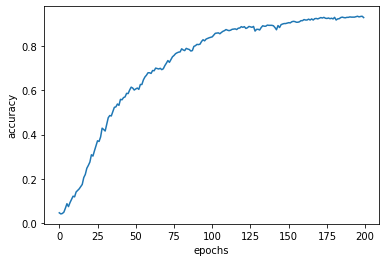

In [114]:
plot_graph(history, 'accuracy')

In [115]:
text = 'I want my love'
next_words = 50
for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([text])[0]
  token_list = pad_sequences([token_list], maxlen = max_len - 1, padding = 'pre')
  predicted = np.argmax(model.predict(token_list), axis=-1)
  output_word = ''
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  text += " " + output_word
print(text)

I want my love with your baby you like i too new now bedsheets room time room do heart lover too much lover lover lover at the shots shots feel it it room room room room do shape a sour shots can lover table bag it too her share her home friends hand sour
